In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

num_qubits = 16

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr, cr)

qc.h(0)

for i in range(num_qubits - 1):
    qc.cx(i, i + 1)


qc.measure(qr, cr)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# expected : 512 (50% prob)
job = simulator.run(compiled_circuit, shots=1024)

counts = job.result().get_counts(qc)
print(counts)


{'0000000000000000': 508, '1111111111111111': 516}


In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import time

num_qubits = 16

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr, cr)

qc.h(0)

for i in range(num_qubits - 1):
    qc.cx(i, i + 1)

qc.measure(qr, cr)


simulator = AerSimulator()
start_time = time.time()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
end_time = time.time()


counts = result.get_counts(qc)

print("Number of Qubits:", num_qubits)
print("Circuit Depth:", compiled_circuit.depth())
print("Number of Instructions:", len(compiled_circuit.data))
print("Execution Time:", round(end_time - start_time, 5), "seconds")


print("Measurement Outcomes:", counts)


Number of Qubits: 16
Circuit Depth: 17
Number of Instructions: 32
Execution Time: 0.08293 seconds
Measurement Outcomes: {'1111111111111111': 519, '0000000000000000': 505}


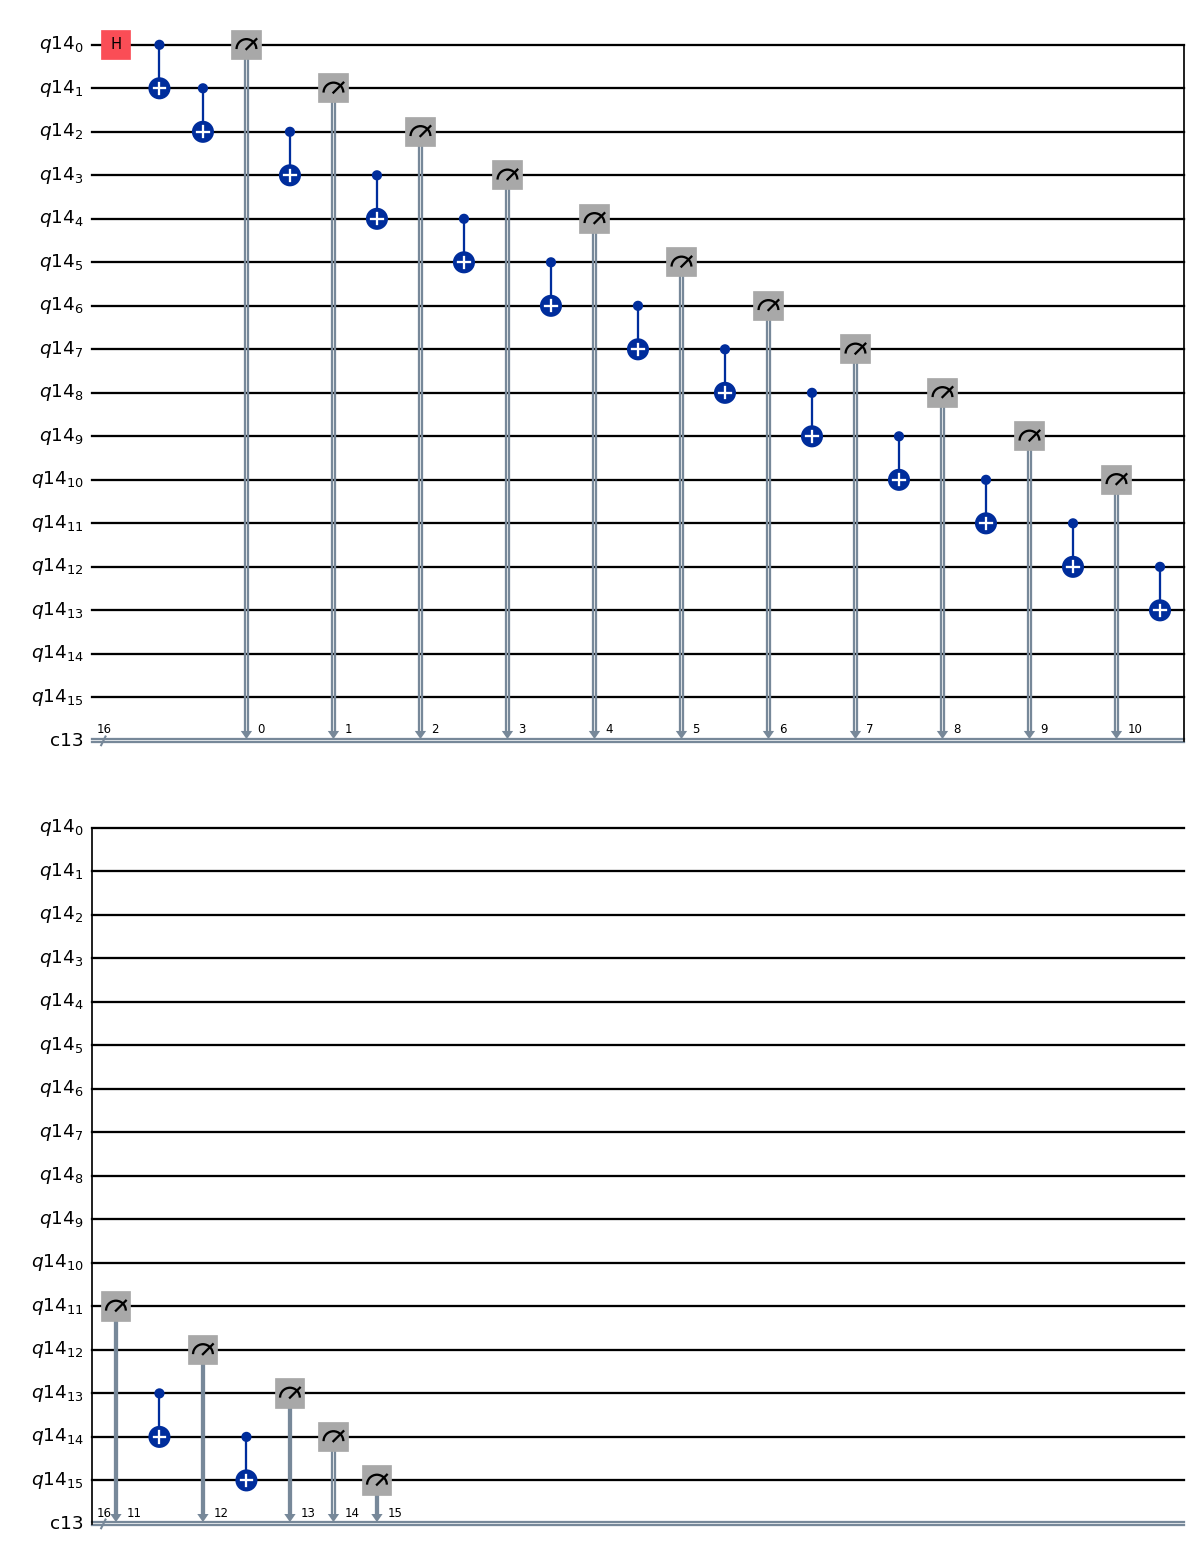

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))  
qc.draw('mpl', ax=ax)
plt.show()
